In [1]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import random
import numpy as np

In [2]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


True

In [3]:
# Cell 2: Load dataset
# Each review is labeled 'pos' or 'neg'
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

texts = [doc for doc, label in documents]
labels = [label for doc, label in documents]

print("Sample Data:")
for i in range(2):
    print(f"\nLabel: {labels[i]} \nText: {texts[i][:200]}...")

Sample Data:

Label: pos 
Text: steven spielberg's " amistad , " which is based on the true story of a group of africans who revolted on board a slave ship , then were captured and taken to america where a legal dispute ensued over ...

Label: neg 
Text: i think maybe it's time for the batman series to be put to rest . 
not only has the first two films' unsettling insight into what it would really take for someone to make himself into a " superhero " ...


In [4]:
# Cell 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

In [5]:
# Cell 4: Convert text to features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF feature shape:", X_train_tfidf.shape)

TF-IDF feature shape: (1600, 3000)


In [6]:
# Cell 5: Train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [7]:
# Cell 6: Evaluate model
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8075

Confusion Matrix:
 [[161  41]
 [ 36 162]]

Classification Report:
               precision    recall  f1-score   support

         neg       0.82      0.80      0.81       202
         pos       0.80      0.82      0.81       198

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [8]:
# Cell 7: Test on custom inputs
sample_docs = [
    "The movie was fantastic, full of great performances!",
    "I hated the film, it was boring and too long.",
    "An average movie with decent acting but poor story."
]

sample_features = vectorizer.transform(sample_docs)
predictions = model.predict(sample_features)

for doc, pred in zip(sample_docs, predictions):
    print(f"\nText: {doc}\nPredicted Sentiment: {pred.upper()}")


Text: The movie was fantastic, full of great performances!
Predicted Sentiment: POS

Text: I hated the film, it was boring and too long.
Predicted Sentiment: NEG

Text: An average movie with decent acting but poor story.
Predicted Sentiment: NEG


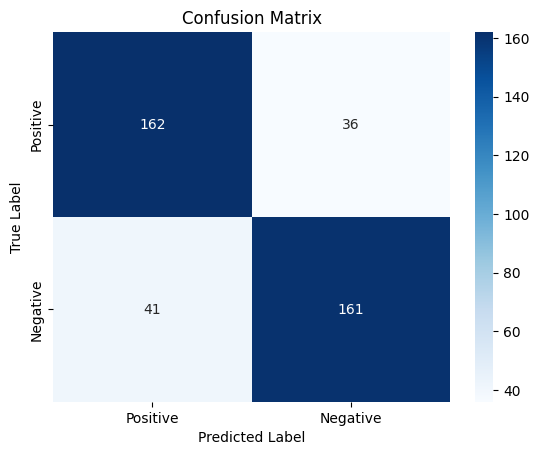

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=['pos', 'neg'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
